In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np


In [2]:
patch_embeddings = np.load('encoded_patches.npy')
mask_embeddings = np.load('encoded_masks.npy')
mask_white_embeddings = np.load('encoded_masks_white.npy')

mask_perc = np.load('perc_mask.npy')

In [3]:
from sklearn.manifold import TSNE

<Axes: >

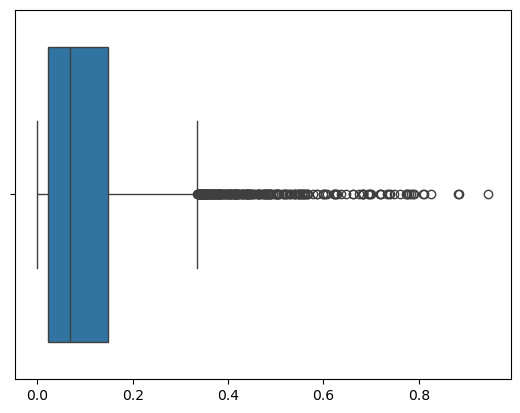

In [134]:
mask_perc = pd.Series(mask_perc)
sns.boxplot(mask_perc, orient='h')

In [130]:
mask_perc.describe()

count    5000.000000
mean        0.106193
std         0.119224
min         0.000000
25%         0.023067
50%         0.068245
75%         0.147984
max         0.945923
dtype: float64

In [ ]:
def custom_tsne_patches_masks(encoded_patches, encoded_masks, color_column, perplexity=30):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_patch = tsne.fit_transform(encoded_patches)
    tsne_mask = tsne.fit_transform(encoded_masks)

    df_patches = pd.DataFrame(tsne_patch, columns=['CP1', 'CP2'])
    df_masks = pd.DataFrame(tsne_mask, columns=['CP1', 'CP2'])

    df_patches['mask_perc'] = color_column.values
    df_masks['mask_perc'] = color_column.values

    return df_patches, df_masks

In [157]:
def custom_tsne_plot(df_patches, df_masks, hue, subtitle_1, subtitle_2, title, legend_title):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    sns.scatterplot(data=df_patches, x='CP1', y='CP2', hue=hue, palette='plasma', ax=axs[0], legend=True, alpha=0.5)
    sns.scatterplot(data=df_masks, x='CP1', y='CP2', hue=hue, palette='plasma', ax=axs[1], legend=True, alpha=0.5)
    axs[0].get_legend().remove()
    axs[1].get_legend().remove()
    axs[0].set_title(subtitle_1)
    axs[1].set_title(subtitle_2)

    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='center right', title=legend_title)
    fig.suptitle(title)
    plt.tight_layout()
    plt.subplots_adjust(right=0.85)
    plt.show()

# New t-SNE fit_transform on patches and transform on mask embeddings 

In [10]:
all_embeddings = patch_embeddings
all_embeddings = np.concatenate((patch_embeddings, mask_embeddings), axis=0)
all_embeddings.shape

(10000, 512)

In [59]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_patch = tsne.fit(all_embeddings)

In [61]:
tsne_df = pd.DataFrame(tsne_patch, columns=['CP1', 'CP2'])
tsne_df['mask_patch'] = ''
tsne_df.loc[0:4999,'mask_patch'] = 'patch'
tsne_df.loc[5000:, 'mask_patch'] = 'mask'


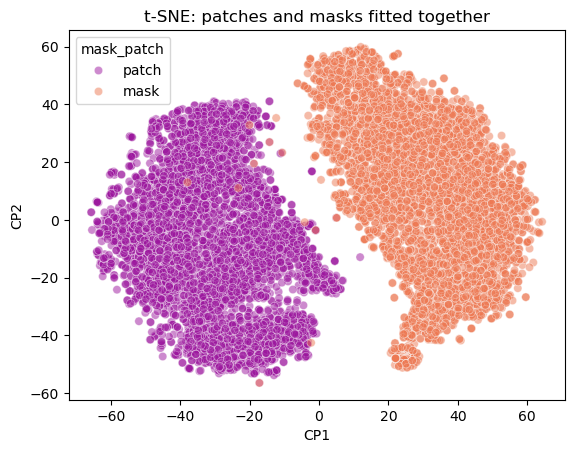

In [62]:
    sns.scatterplot(data=tsne_df, x='CP1', y='CP2', hue='mask_patch', palette='plasma', legend=True, alpha=0.5)
    plt.title('t-SNE: patches and masks fitted together')
    plt.show()


In [27]:
from openTSNE import TSNE

In [29]:
tsne = TSNE(perplexity=30, random_state=42)
embedding_train = tsne.fit(patch_embeddings)

In [37]:
embedding_mask = embedding_train.transform(mask_embeddings)

In [41]:
df_mask = pd.DataFrame(embedding_mask, columns=['CP1', 'CP2'])
df_mask['mask_patch'] = 'mask' 
df_mask['mask_perc'] = mask_perc

In [43]:
df_patches = pd.DataFrame(embedding_train, columns=['CP1', 'CP2'])
df_patches['mask_patch'] = 'patch'
df_patches['mask_perc'] = mask_perc

In [48]:
combined_df = pd.concat([df_patches, df_mask], axis=0, ignore_index=True)

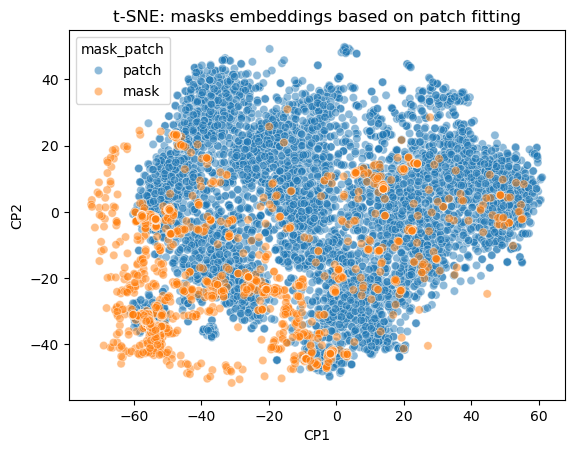

In [63]:
sns.scatterplot(data=combined_df, x='CP1', y='CP2', hue='mask_patch', alpha=0.5)
plt.title('t-SNE: masks embeddings based on patch fitting')
plt.show()

# Rest from before 

In [137]:
# bin the patches based on mask percentage 
num_bins = 3 
bins = pd.cut(mask_perc, bins=num_bins, labels=False)


In [138]:
# select bin 
bin_filter = mask_perc < 0.15
mask_perc_bin = mask_perc[bin_filter]

# select patches and masks based on bin
encoded_patches_bin = patch_embeddings[bin_filter ]
encoded_masks_bin = mask_white_embeddings[bin_filter]

In [97]:
df_patches, df_masks = custom_tsne_patches_masks(encoded_patches=patch_embeddings, encoded_masks=mask_white_embeddings, color_column=mask_perc))

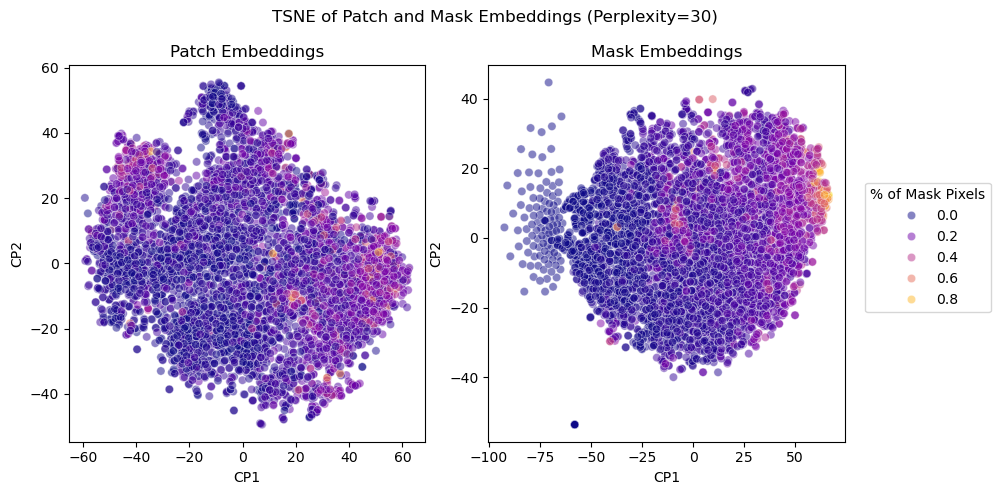

In [113]:
custom_tsne_plot(df_patches=df_patches, df_masks=df_masks, mask_perc=mask_perc_bin, title='TSNE of Patch and Mask Embeddings (Perplexity=30)')

In [114]:
df_black, df_white = custom_tsne_patches_masks(encoded_patches=mask_embeddings, encoded_masks=mask_white_embeddings, color_column=mask_perc)


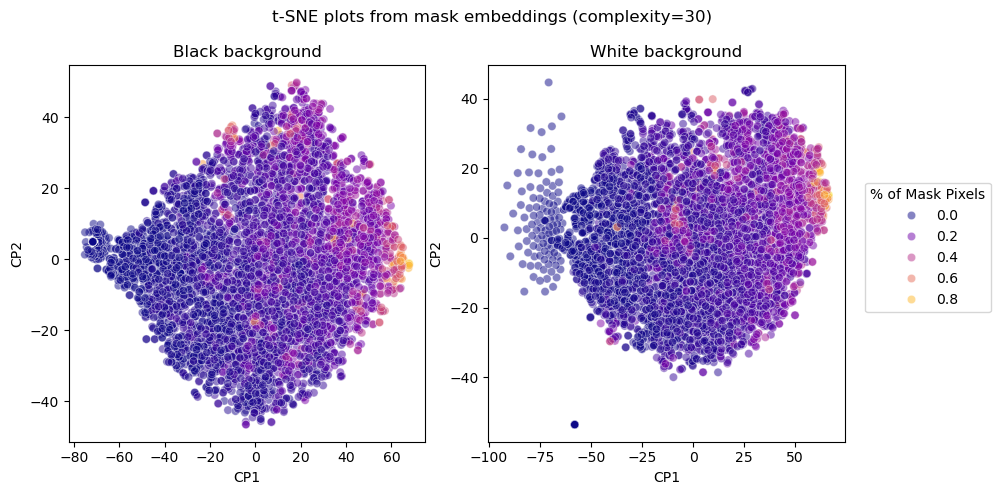

In [118]:
custom_tsne_plot(df_patches=df_black, df_masks=df_white, mask_perc=mask_perc, subtitle_1='Black background', subtitle_2='White background', title='t-SNE plots from mask embeddings (complexity=30) ')

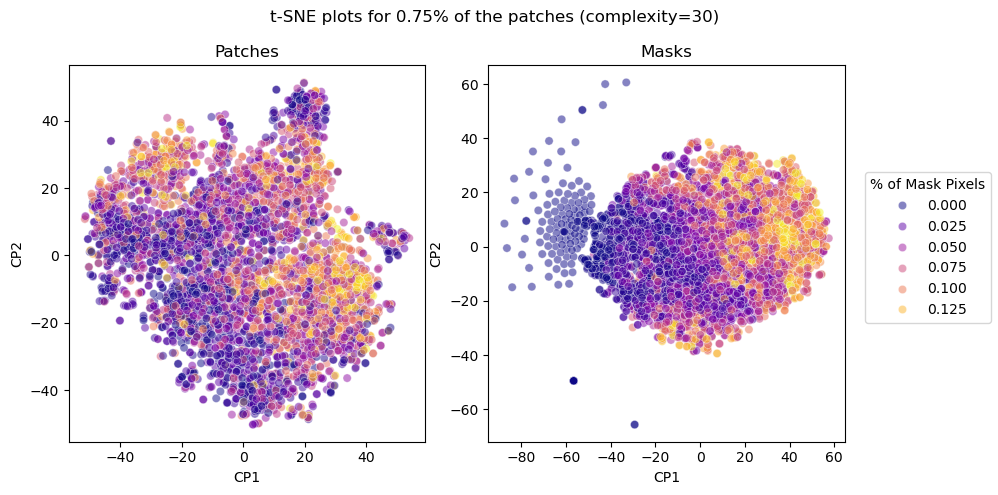

In [141]:
df_patches, df_masks = custom_tsne_patches_masks(encoded_patches=encoded_patches_bin, encoded_masks=encoded_masks_bin, color_column=mask_perc_bin)
custom_tsne_plot(df_patches=df_patches, df_masks=df_masks, mask_perc=mask_perc_bin, subtitle_1='Patches', subtitle_2='Masks', title='t-SNE plots for 0.75% of the patches (complexity=30)')

In [142]:
mask_perc = pd.Series(mask_perc)
mask_or_non = mask_perc > 0

In [151]:
df_coloring = pd.DataFrame({'mask_perc': mask_perc, 'mask_or_non': mask_or_non})
df_coloring

,mask_perc,mask_or_non
0,0.203705,True
1,0.025299,True
2,0.112686,True
3,0.032089,True
4,0.245255,True
...,...,...
4995,0.000107,True
4996,0.033966,True
4997,0.012039,True
4998,0.017334,True


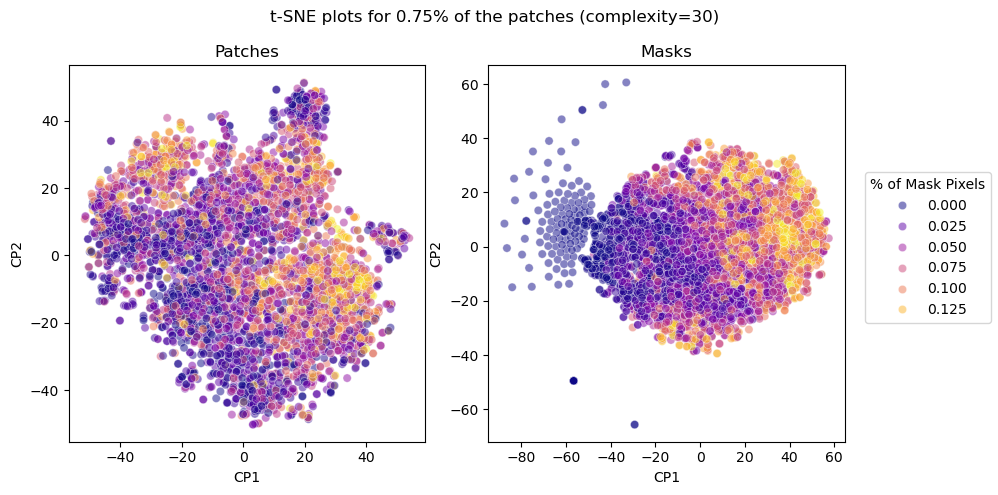

In [144]:
custom_tsne_plot(df_patches=df_patches, df_masks=df_masks, mask_perc=, subtitle_1='Patches', subtitle_2='Masks', title='t-SNE plots for 0.75% of the patches (complexity=30)')

In [155]:
df_patches['mask_or_non'] = df_coloring[bin_filter]['mask_or_non']
df_masks['mask_or_non'] = df_coloring[bin_filter]['mask_or_non']

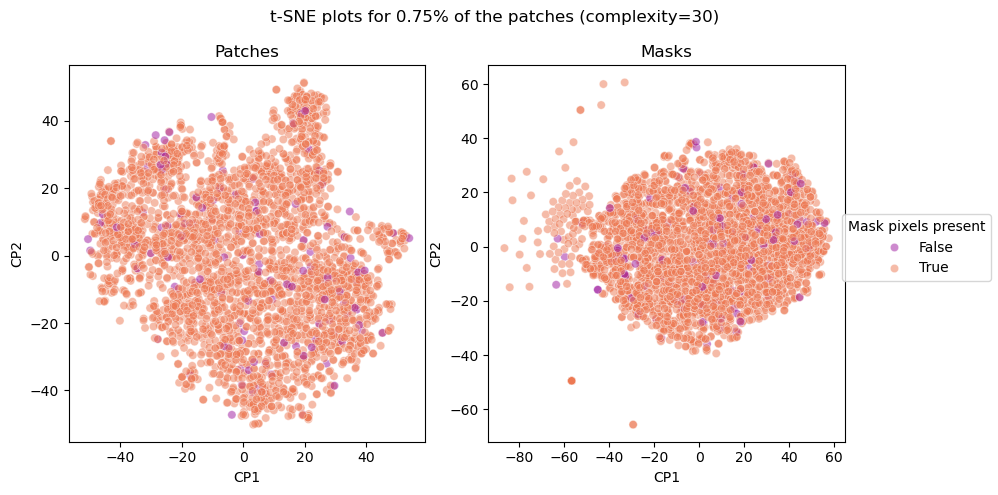

In [158]:
custom_tsne_plot(df_patches=df_patches, df_masks=df_masks, hue='mask_or_non', subtitle_1='Patches', subtitle_2='Masks', title='t-SNE plots for 0.75% of the patches (complexity=30)', legend_title='Mask pixels present')